<a href="https://colab.research.google.com/github/ankita1200/Machine-Learning-Topics/blob/main/DecisionTrees_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import ShuffleSplit
from sklearn.base import clone
import numpy as np
from scipy.stats import mode

In [2]:
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [5]:
export_graphviz(tree_clf, out_file="iris_tree.dot", feature_names=["petal length (cm)", "petal width (cm)"], class_names=iris.target_names, rounded=True, filled=True)

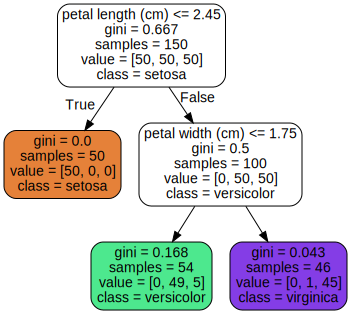

In [7]:
Source.from_file("iris_tree.dot")

In [3]:
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)


In [14]:
X_moons.shape

(10000, 2)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

In [6]:
params = {
    'max_leaf_nodes' : list(range(2,100)),
    'max_depth' : list(range(1,10)),
    'min_samples_split' : [2,3,4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [7]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=48, random_state=42)

In [8]:
clf = DecisionTreeClassifier(max_depth=9, max_leaf_nodes=48, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=48, random_state=42)

In [11]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8605

In [12]:
clf = DecisionTreeClassifier(max_depth=9, max_leaf_nodes=48, random_state=42)
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8503937 , 0.85939258, 0.85858965])

In [27]:
n_trees = 1000
n_instances = 100

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_test) - n_instances, random_state=42)
mini_sets = []
for train_index, test_index in rs.split(X_train):
  mini_X_train = X_train[train_index]
  mini_y_train = y_train[train_index]
  mini_sets.append((mini_X_train, mini_y_train))

In [29]:
trees = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

In [33]:
accuracy_scores = []
for tree,(X_mini_train, y_mini_train) in zip(trees, mini_sets):
  tree.fit(X_mini_train, y_mini_train)
  y_preds = tree.predict(X_test)
  accuracy_scores.append(accuracy_score(y_test, y_preds))
np.mean(accuracy_scores)

0.8617229999999999

In [38]:
y_preds = np.empty([n_trees,len(X_test)], dtype=np.uint8)
for tree_index, tree in enumerate(trees):
  y_preds[tree_index] = tree.predict(X_test)
y_pred_majority_vote, counts = mode(y_preds, axis=0)

In [43]:
y_pred_majority_vote.reshape([-1])

(2000,)

In [44]:
accuracy_score(y_test, y_pred_majority_vote.reshape([-1]))

0.867